In [15]:
import os
from tqdm.auto import tqdm
%load_ext autoreload
%autoreload 2
from helpers import get_df_from_logdir
import pandas as pd
import plotly.express as px
import numpy as np

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
config_name = 've5_nonlinear_server_collect_ve5_rec_nonlin_gnn_gumbel_siamese_l2_search_opt_fit_ve5_dec_rec'
path = f"/home/sergei/ray_results/{config_name}/"
trials = os.listdir(path)
trials = [os.path.join(path, trial) for trial in trials]
trials = sorted(filter(os.path.isdir, trials))
print(f"Got {len(trials)} trials")

Got 44 trials


# Reading trial data

In [32]:
def get_last_epoch(trial):
    """Get last row with epoch data."""
    try:
        df = get_df_from_logdir(trial, do_tqdm=False)
    except FileNotFoundError:
        return None
    if hasattr(df, 'epochs'):
        df = df[df.epochs==max(df.epochs)]
        return df.iloc[0]
    return None

df = [get_last_epoch(trial) for trial in tqdm(trials)]
df = pd.DataFrame([x for x in df if x is not None])
df.to_csv(f'{config_name}.csv', index=False)

In [33]:
df = pd.read_csv(f'{config_name}.csv')
df

,epochs,n_samples,losses/opt1/non_sparse_fit/coeff,losses/opt1/non_sparse_fit/value,losses/opt1/value,grads/opt1/grad_total_l1mean,grads/opt1/grad_total_l2sum,metrics/batch_index,metrics/batch_size,metrics/mean_feature,metrics/std_feature,metrics/min_feature,metrics/max_feature,metrics/std_feature_avg,metrics/inv_std_feature_avg,metrics/episode_reward,metrics/non_sparse_fit_loss_smooth,weights/model/bn.weight,weights/model/bn.bias,weights/model/model.switch.probas,weights/model/model.model.fc01.weight,weights/model/model.model.fc01.bias,weights/model/model.model.fc02.weight,weights/model/model.model.fc02.bias,weights/model/model.model.fc03.weight,weights/model/model.model.fc03.bias,weights/model/model.model.fc04.weight,weights/model/model.model.fc04.bias,weights/decoder/model.fc01.weight,weights/decoder/model.fc01.bias,weights/decoder/model.fc02.weight,weights/decoder/model.fc02.bias,weights/decoder/model.fc03.weight,weights/decoder/model.fc03.bias,weights/decoder/model.fc04.weight,weights/decoder/model.fc04.bias,weights/non_sparse_model/bn.weight,weights/non_sparse_model/bn.bias,weights/non_sparse_model/model.switch.probas,weights/non_sparse_model/model.model.fc01.weight,weights/non_sparse_model/model.model.fc01.bias,weights/non_sparse_model/model.model.fc02.weight,weights/non_sparse_model/model.model.fc02.bias,weights/non_sparse_model/model.model.fc03.weight,weights/non_sparse_model/model.model.fc03.bias,weights/non_sparse_model/model.model.fc04.weight,weights/non_sparse_model/model.model.fc04.bias,CausalModel,model,checkpoint_tune,checkpoint_size,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,config/name,config/base_dir,config/db_name,config/sources,config/log_sys_usage,config/_gin__lr__loguniform,config/_gin__b1__choice,config/_gin__b2__choice,config/_gin__iters__choice,config/_gin__ratio__choice,time_since_restore,timesteps_since_restore,iterations_since_restore,perf/cpu_util_percent,perf/ram_util_percent,perf/gpu_util_percent0,perf/vram_util_percent0,perf/gpu_util_percent1,perf/vram_util_percent1,trial_id,experiment_tag,metrics/context_stats_collect_iters,metrics/context_stats_collected_sampled_ratio,metrics/context_stats_pending_refs,metrics/context_stats_steps_collected,metrics/context_stats_steps_collected_now,metrics/context_stats_steps_sampled,metrics/context_stats_steps_sampled_laps,metrics/context_stats_collect_time_s,metrics/context_stats_steps_collected_laps
0,830.0,5000.0,1.0,7.400468e-03,7.400468e-03,1.065788e-03,0.956704,0.0,-1.0,[ 1.0375475 -0.16095313 -0.01850889 1.026196...,[0.24477981 0.24219778 0.12858953 0.22070329 0...,-1.565734,6.794837,0.0,0.0,25.921961,9.439713e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272049,NaN,False,NaN,NaN,831,8745aae2dd13433b87a29cadf36096e2,2021-02-10_01-58-06,1612918686,848.679359,731,iccluster031,10.90.38.7,ve5_nonlinear_server_collect_ve5_rec_nonlin_gn...,/home/sergei/causality-disentanglement/results...,causal_sparse,['/home/sergei/causality-disentanglement/vecto...,True,0.000494,0.8000,0.5000,2,0.7,848.679359,0,831,70.500000,16.900000,0.060000,0.212005,0.690000,0.283410,0d299_00000,"0__gin__b1__choice=0.8,_gin__b2__choice=0.5,_g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1060.0,5000.0,1.0,1.333171e-01,1.333171e-01,3.379052e-04,0.460523,0.0,-1.0,[ 0.01949841 1.1521044 -0.03400096 1.115083...,[0.03946284 0.8155843 0.09132114 0.69294214 0...,-2.469868,7.303959,0.0,0.0,26.058956,1.596184e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.576336,NaN,False,NaN,NaN,1061,216148e6d72d4377b588e9c565bebd20,2021-02-10_01-58-12,1612918692,854.759662,733,iccluster031,10.90.38.7,ve5_nonlinear_server_collect_ve5_rec_nonlin_gn...,/home/sergei/causality-disentanglement/results...,causal_sparse,['/ho

In [34]:
del df['losses/opt1/value']
del df['metrics/mean_feature']
del df['metrics/std_feature']
del df['metrics/min_feature']
del df['metrics/max_feature']
del df['metrics/episode_reward']
del df['metrics/non_sparse_fit_loss_smooth']
del df['metrics/context_stats_steps_collected_laps']
del df['metrics/context_stats_collect_iters']
del df['metrics/context_stats_collect_time_s']
del df['metrics/context_stats_steps_collected_now']
del df['metrics/context_stats_pending_refs']
del df['metrics/context_stats_steps_collected']
del df['metrics/context_stats_steps_sampled_laps']
del df['metrics/context_stats_collected_sampled_ratio']
del df['metrics/context_stats_steps_sampled']

In [35]:
all_fields = [c for c in df.columns if any([c.startswith(t) for t in ['losses', 'metrics', 'config']])]
all_fields = [f for f in all_fields if len(set(df[f])) > 1]
all_fields.append('time_total_s')
# all_fields.remove('config/base_dir')
all_fields

['losses/opt1/non_sparse_fit/value',
 'config/base_dir',
 'config/_gin__lr__loguniform',
 'config/_gin__b1__choice',
 'config/_gin__b2__choice',
 'config/_gin__iters__choice',
 'config/_gin__ratio__choice',
 'time_total_s']

In [36]:
def removeprefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text  # or whatever


def shorten(x):
    x = removeprefix(x, 'losses/opt1/')
    x = removeprefix(x, 'config/_gin__')
    x = removeprefix(x, 'metrics/')
    return x
labels = {x: shorten(x) for x in all_fields}

In [37]:
for c in df.columns:
    if c.endswith('loguniform') or 'gin__b1' in c or 'gin__b2' in c:
        df[c] = np.log10(df[c])

In [38]:
df['losses/opt1/non_sparse_fit/value'] = np.log10(df['losses/opt1/non_sparse_fit/value'])

In [39]:
df['time_total_s'] /= 3600

In [40]:
df[all_fields]

,losses/opt1/non_sparse_fit/value,config/base_dir,config/_gin__lr__loguniform,config/_gin__b1__choice,config/_gin__b2__choice,config/_gin__iters__choice,config/_gin__ratio__choice,time_total_s
0,-2.130741,/home/sergei/causality-disentanglement/results...,-3.306464,-0.096910,-0.301030,2,0.7,0.235744
1,-0.875114,/home/sergei/causality-disentanglement/results...,-1.093412,-0.096910,-0.004365,5,0.1,0.237433
2,-3.083331,/home/sergei/causality-disentanglement/results...,-3.126094,-0.301030,-0.000435,4,0.1,0.237546
3,-0.170077,/home/sergei/causality-disentanglement/results...,-1.704396,-0.004365,-0.000435,5,0.5,0.237825
4,-2.711827,/home/sergei/causality-disentanglement/results...,-2.364589,-0.045757,-0.000435,2,0.1,0.237959
5,0.458181,/home/sergei/causality-disentanglement/results...,-3.180073,-0.000435,-0.004365,3,0.5,0.237722
6,-1.565486,/home/sergei/causality-disentanglement/results...,-4.404963,-0.000043,-0.000435,2,0.5,2.208128
7,-2.758588,/home/sergei/causality-disentanglement/results...,-4.960118,-0.096910,-0.301030,3,0.7,3.139202
8,-0.613623,/home/sergei/causality-disentanglement/results...,-1.064195,-0.301030,-0.301030,1,0.5,2.198379
9,-3.574869,/home/sergei/causality-disentanglement/results...,-2.546533,-0.301030,-0.045757,5,0.7,3.108525


In [41]:
df = df[df['losses/opt1/non_sparse_fit/value'] <= 0]

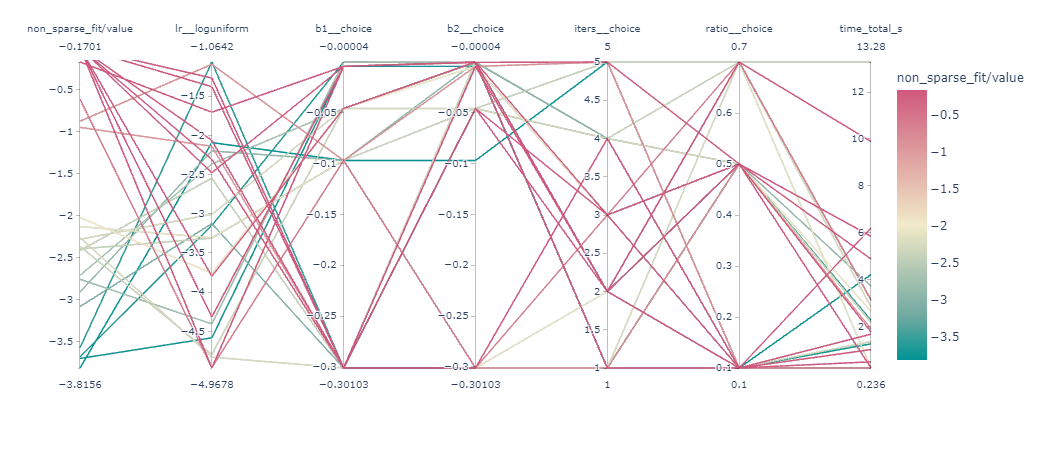

In [42]:
fig = px.parallel_coordinates(df[all_fields], color="losses/opt1/non_sparse_fit/value",
                              labels=labels,
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [43]:
10**(-0.3)

0.5011872336272722

In [45]:
10**(-0.00004)

0.9999079008376686